# Predicting Insurance Charges Using Linear Regression
**Author:** Billy Pierre  
**Date:** May 24, 2025  
**Tools:** Python, Pandas, Scikit-learn, Matplotlib, Seaborn


## Objective

In this notebook, we explore a dataset of medical insurance records and use linear regression to predict charges based on demographic and lifestyle features. We'll analyze data patterns, train a model, evaluate its accuracy, and discuss future improvement opportunities.


# Predicting Medical Insurance Charges Using Linear Regression

In this notebook, we explore a real-world dataset to understand how factors like age, BMI, and smoking status affect medical insurance costs. We use linear regression to build a predictive model and evaluate its performance.


In [2]:
from google.colab import files
uploaded = files.upload ()

Saving insurance.csv to insurance.csv


## 1. Load and Explore the Data

We begin by importing necessary libraries and loading the insurance dataset. We preview its structure, check for null values, and review basic summary statistics.


In [10]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('insurance.csv')

# Basic structure
print("Columns:", df.columns.tolist())
print("\nPreview:")
print(df.head())

# Null values
print("\nNull values:", df.isnull().sum())

# Summary stats
print("\nSummary statistics:")
print(df.describe())


Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Preview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Null values: age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000 

### Interpretation:

The dataset has no missing values. The average age is 39, and insurance charges range widely from \$1,122 to over \$63,000. Smoking status appears to be a major factor influencing charges.


## 2. Encode Categorical Features

We use LabelEncoder to convert categorical variables (sex, smoker, and region) into numeric values for modeling.


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])


## 3. Correlation Analysis

We examine how each feature correlates with insurance charges using a heatmap and bar plot.


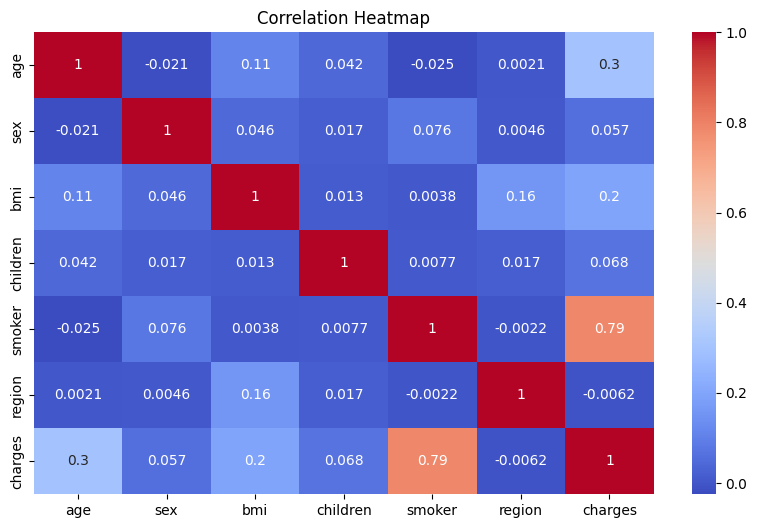

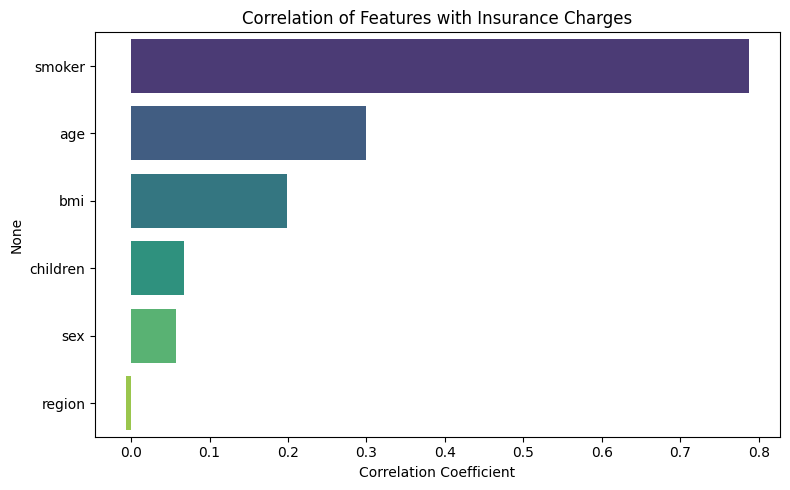

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Bar plot of correlations with charges
correlation_with_charges = correlation['charges'].drop('charges').sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_with_charges.values, y=correlation_with_charges.index, hue=correlation_with_charges.index, palette='viridis', legend=False)
plt.title('Correlation of Features with Insurance Charges')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


## 4. Train-Test Split and Model Training

We split the dataset into training and testing sets and train a linear regression model to predict charges.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 5. Model Evaluation

We evaluate the model's performance using Mean Squared Error (MSE) and R² Score, and compare predictions to actual values.


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 33635210.431178406
R² Score: 0.7833463107364539


### Model Evaluation

- **Mean Squared Error (MSE):** 33,635,210.43  
- **R² Score:** 0.7833  

This means our model explains about 78.3% of the variance in insurance charges. While this is a strong result, the high MSE suggests it struggles with very high charges.


## 6. Visualization: Actual vs. Predicted Charges

We plot predicted charges against actual charges to visualize model performance.


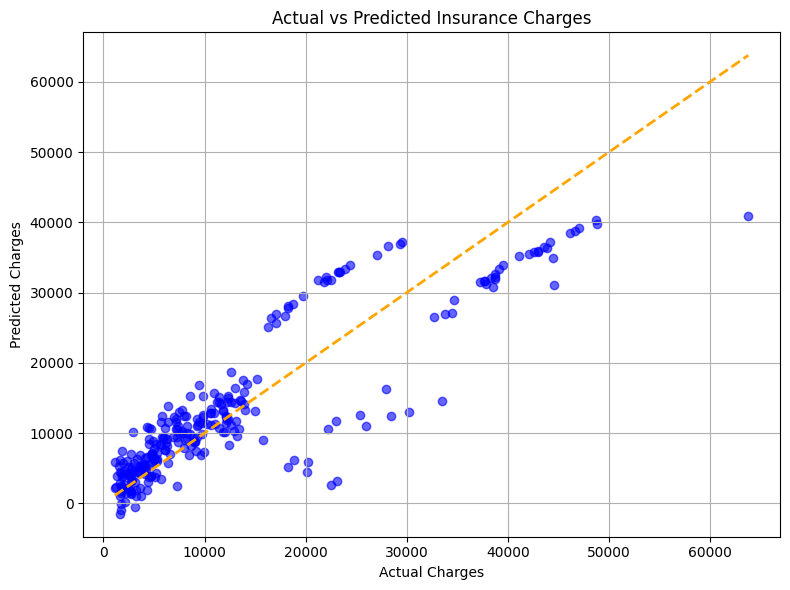

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', linewidth=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusion

This project demonstrates that linear regression is effective for predicting insurance charges using features such as smoking status, age, and BMI. While the model performs well overall, it could be improved using polynomial regression, regularization, or ensemble techniques to capture more complex patterns and reduce error on outliers.


## References

- Pedregosa, F. et al. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, 12, 2825–2830.  
- McKinney, W. (2010). Data Structures for Statistical Computing in Python. *Python in Science Conference*, 51–56.
